# Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import os

from PIL import Image
from matplotlib.image import imread
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

# Pre-proccessing

### Carga de dataset y creación de dataframe con las rutas de las imágenes sus clases correspondientes

In [13]:
base = "C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc"

rutas = [
    "data/raw/data_perros_emociones/Dog_Emotion/angry",
    "data/raw/data_perros_emociones/Dog_Emotion/happy",
    "data/raw/data_perros_emociones/Dog_Emotion/relaxed",
    "data/raw/data_perros_emociones/Dog_Emotion/sad"
]

lista_rutas = []
target = []

for ruta in rutas:
    ruta_total = os.path.join(base, ruta)

    for foto in os.listdir(ruta_total):

        if foto.lower().endswith((".jpeg", ".JPEG", ".png", ".bmp", ".tiff", ".jpg")):
            ruta_original = os.path.join(ruta_total, foto)
            nombre_sin_ext = os.path.splitext(foto)[0]
            ruta_nueva = os.path.join(ruta_total, nombre_sin_ext + ".jpg")

            if not ruta_original.lower().endswith(".jpg"):
                img = Image.open(ruta_original).convert("RGB")
                img.save(ruta_nueva, "JPEG")
                os.remove(ruta_original)
                print(f"Convertido: {ruta_original} → {ruta_nueva}")
            else:
                ruta_nueva = ruta_original  

            lista_rutas.append(ruta_nueva)
            target.append(os.path.basename(ruta_total))

print(lista_rutas)
print(len(lista_rutas))
print("*" * 50)
print(target)
print(len(target))

['C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/raw/data_perros_emociones/Dog_Emotion/angry\\09dUVMcjCDfOtbeYDQg5Fvu3GPHWJg811.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/raw/data_perros_emociones/Dog_Emotion/angry\\0aNyXBrmNA7XdefwHvgO2n1rnpqQAp885.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/raw/data_perros_emociones/Dog_Emotion/angry\\0AvKtuzA7LfxnKaO0bey9mQMLnxXad73.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/raw/data_perros_emociones/Dog_Emotion/angry\\0C5yo7GxMy8lztxNZvSdfEx2gSPRTR701.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/raw/data_perros_emociones/Dog_Emotion/angry\\0C9jEgFQHsh36W5U2u5CA98lB7C5eX806.jpg', 'C:\\Users

In [14]:
df = pd.DataFrame({"path_fotos": lista_rutas, "target": target})
df

path_fotos target
0     C:\Users\Administrador\Desktop\repositorios_ag...  angry
1     C:\Users\Administrador\Desktop\repositorios_ag...  angry
2     C:\Users\Administrador\Desktop\repositorios_ag...  angry
3     C:\Users\Administrador\Desktop\repositorios_ag...  angry
4     C:\Users\Administrador\Desktop\repositorios_ag...  angry
...                                                 ...    ...
3995  C:\Users\Administrador\Desktop\repositorios_ag...    sad
3996  C:\Users\Administrador\Desktop\repositorios_ag...    sad
3997  C:\Users\Administrador\Desktop\repositorios_ag...    sad
3998  C:\Users\Administrador\Desktop\repositorios_ag...    sad
3999  C:\Users\Administrador\Desktop\repositorios_ag...    sad

[4000 rows x 2 columns]

In [15]:
df["target"].value_counts()

target
angry      1000
happy      1000
relaxed    1000
sad        1000
Name: count, dtype: int64

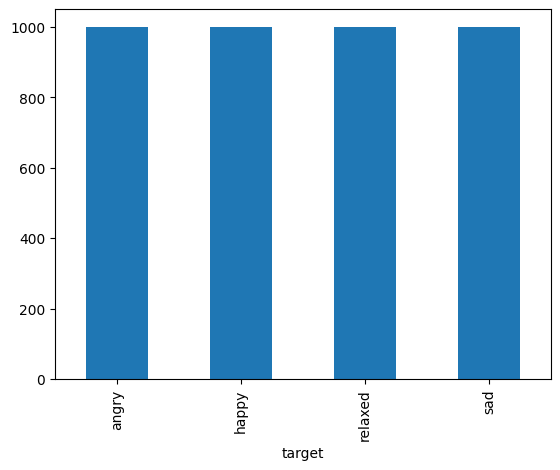

In [16]:
df['target'].value_counts().plot.bar();

### Creación de X e y para entrenamiento de modelos

In [17]:
img_height, img_width = 64, 64
lista_fotos_3d = []
lista_fotos_flat = []

for foto in df["path_fotos"]:
    if os.path.exists(foto):
        img = Image.open(foto).convert("RGB")
        img_resized = img.resize((img_height, img_width))
        img_array = np.array(img_resized)
        img_flat = img_array.flatten()
        lista_fotos_3d.append(img_array)
        lista_fotos_flat.append(img_flat)
    else:
        print(f"Imagen no encontrada: {foto}")

X_3d = np.array(lista_fotos_3d)
X_flat = np.array(lista_fotos_flat)

print("Shape X_3d:", X_3d.shape)
print("Shape X_flat:", X_flat.shape)

print(lista_fotos_3d)
print(len(lista_fotos_3d))
print("_" * 50)
print(lista_fotos_flat)
print(len(lista_fotos_flat))

Shape X_3d: (4000, 64, 64, 3)
Shape X_flat: (4000, 12288)
[array([[[0, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [1, 1, 1],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [1, 1, 1]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], shape=(64, 64, 3), dtype=uint8), array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1

#### Creación de X e y para entrenamiento de modelos supervisados

In [7]:
X_flat = np.array(lista_fotos_flat)
X_flat.shape

(4000, 12288)

In [19]:
y = df["target"]
y

0       angry
1       angry
2       angry
3       angry
4       angry
        ...  
3995      sad
3996      sad
3997      sad
3998      sad
3999      sad
Name: target, Length: 4000, dtype: object

#### Creación de X e y para entrenamiento de modelos no supervisados

In [9]:
X_rgb = np.array(lista_fotos_3d)
X_rgb.shape

(4000, 64, 64, 3)

In [10]:
# Normalización de y con One Hot Encoder
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(df[["target"]]).toarray()

y_encoded

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], shape=(4000, 4))

#### Exportación de todos los arrays 

In [11]:
ruta = "../data/exports"

# Modelos supervisados
np.save(os.path.join(ruta, "X_flat.npy"), X_flat)
np.save(os.path.join(ruta, "y.npy"), y)

# Modelos no supervisados
np.save(os.path.join(ruta, "X_rgb.npy"), X_rgb)
np.save(os.path.join(ruta, "y_encoded.npy"), y_encoded)
